In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')
# anime_df = pd.read_csv('/content/drive/MyDrive/RecSys/data/anime.csv')
# rating_df = pd.read_csv('/content/drive/MyDrive/RecSys/data/rating.csv')

anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')

Tabel rating yang berisi kolom user_id artinya user yang telah memberi rating

In [3]:
anime_df.info()
print('===================================')
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [4]:
# print('Jumlah data rating yang diberikan pengguna menonton anime: ', len(rateAnime.user_id.unique()))
# print('Jumlah data rating anime: ', len(rateAnime.anime_id.unique()))
# # print('Jumlah data rating : ', len(rateAnime))

print(f"anime set (row, col): {anime_df.shape}\n\nrating set (row, col): {rating_df.shape}")

anime set (row, col): (12294, 7)

rating set (row, col): (7813737, 3)


In [5]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [7]:
print('Jumlah anime_id di anime.csv: ', len(anime_df.anime_id.unique()))
print('Jumlah anime_id di rating.csv: ', len(rating_df.anime_id.unique()))
print('Jumlah user_id: ', len(rating_df.user_id.unique()))
print('Jumlah rating di anime.csv: ', len(anime_df.rating.unique()))
print('Jumlah rating di rating.csv: ', len(rating_df.rating.unique()))


Jumlah anime_id di anime.csv:  12294
Jumlah anime_id di rating.csv:  11200
Jumlah user_id:  73515
Jumlah rating di anime.csv:  599
Jumlah rating di rating.csv:  11


### Exploratory Data Analysis

C:\Users\innovationcenter\AppData\Local\Temp\ipykernel_5992\3608917536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.values,
c:\Users\innovationcenter\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\innovationcenter\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Us

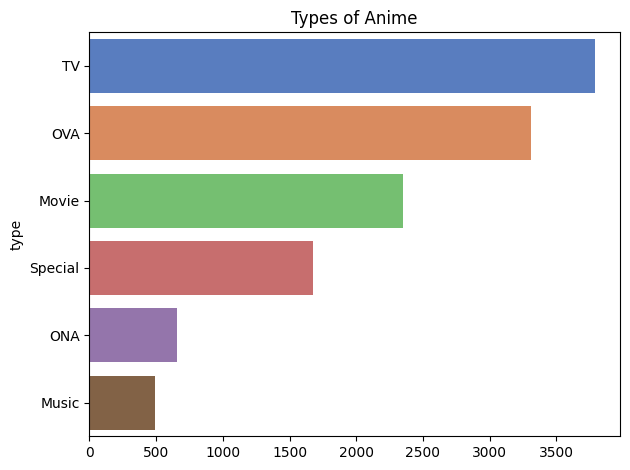

In [11]:
type_count = anime_df['type'].value_counts()

sns.barplot(x=type_count.values,
            y=type_count.index,
            palette='muted').set_title('Types of Anime')

plt.tight_layout()
plt.show()

# Data Preprocessing

menghitung rata rata rating yang di berikan user berdasarkan user_id


In [12]:
# kalkulasi rata rata user_id yang memberi rating
rating_df = rating_df[rating_df.user_id <= 10000]

In [13]:
# Preprocess the rating dataset (handle -1 ratings as NaN)
rating_df['rating'] = rating_df['rating'].replace(-1, pd.NA)
rating_df

,user_id,anime_id,rating
0,1,20,<NA>
1,1,24,<NA>
2,1,79,<NA>
3,1,226,<NA>
4,1,241,<NA>
...,...,...,...
1042692,10000,16498,10
1042693,10000,18247,8
1042694,10000,18679,8
1042695,10000,21995,10


In [14]:
# Delete duplicated items
rating_df1 = rating_df.drop_duplicates(['user_id'])
rating_df2 = rating_df1.drop_duplicates(['anime_id'])


In [15]:
rating_df2

,user_id,anime_id,rating
0,1,20,<NA>
153,2,11771,10
250,4,6,<NA>
806,7,22,7
1149,8,269,9
...,...,...,...
1035596,9912,1639,<NA>
1035671,9916,3681,8
1035674,9917,32182,10
1036126,9927,22199,8


In [16]:
rating_df2['rating'] = rating_df2['rating'].fillna(0)

rating_df2

C:\Users\innovationcenter\AppData\Local\Temp\ipykernel_5992\3061934956.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rating_df2['rating'] = rating_df2['rating'].fillna(0)
C:\Users\innovationcenter\AppData\Local\Temp\ipykernel_5992\3061934956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df2['rating'] = rating_df2['rating'].fillna(0)


,user_id,anime_id,rating
0,1,20,0
153,2,11771,10
250,4,6,0
806,7,22,7
1149,8,269,9
...,...,...,...
1035596,9912,1639,0
1035671,9916,3681,8
1035674,9917,32182,10
1036126,9927,22199,8


In [17]:
mergedata = pd.merge(anime_df, rating_df2,on=['anime_id','anime_id'])
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,3798,10
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,238,10
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,70,10
3,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,1792,9
4,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,719,10
5,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,3661,10
6,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,606,10
7,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,3679,9
8,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,216,10
9,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,9768,10


In [18]:
mergedata.shape

(545, 9)

# Data Preparation
### Handling missing value

In [19]:
mergedata.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [20]:
# Mengurutkan anime berdasarkan user_id kemudian memasukkannya ke dalam variabel sort anime userid
sort_anime_userid = mergedata.sort_values('user_id', ascending=True)
sort_anime_userid

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
211,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,1,0
47,11771,Kuroko no Basket,"Comedy, School, Shounen, Sports",TV,25,8.46,338315,2,10
77,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,4,0
142,22,Prince of Tennis,"Action, Comedy, School, Shounen, Sports",TV,178,8.04,87643,7,7
157,269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055,8,9
...,...,...,...,...,...,...,...,...,...
544,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,9912,0
541,3681,Tokyo Requiem,"Demons, Hentai, Supernatural",OVA,2,5.92,1392,9916,8
31,32182,Mob Psycho 100,"Action, Comedy, Slice of Life, Supernatural",TV,12,8.55,193716,9917,10
197,22199,Akame ga Kill!,"Action, Adventure, Fantasy",TV,24,7.84,492133,9927,8


In [21]:
preparation = sort_anime_userid

# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
id = preparation['anime_id'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
judul_anime = preparation['name'].tolist()

# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
genre = preparation['genre'].tolist()

print(len(id))
print(len(judul_anime))
print(len(genre))

545
545
545


In [22]:
# Membuat dictionary untuk data ‘userRater', judul_anime, id_anime'
recom_anime = pd.DataFrame({
    'id': id,
    'judul_anime': judul_anime,
    'genre' : genre
})


# Content Based Filtering

In [28]:
data = recom_anime
data.sample(5)

,id,judul_anime,genre
353,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
114,228,Jigoku Shoujo,"Horror, Mystery, Psychological, Supernatural"
301,440,Shoujo Kakumei Utena,"Drama, Fantasy, Psychological, Shoujo"
522,16742,Watashi ga Motenai no wa Dou Kangaetemo Omaera...,"Comedy, School, Shounen, Slice of Life"
18,59,Chobits,"Comedy, Drama, Ecchi, Romance, Sci-Fi, Seinen"


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [30]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(545, 47)

In [31]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.22486638, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.4553167 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.30426371, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.50222798, 0.61788751, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [32]:

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index= data.judul_anime
).sample(22, axis=1).sample(10, axis=0)

,josei,samurai,power,space,sports,cars,music,of,vampire,harem,...,ai,super,magic,military,drama,seinen,hentai,shounen,yaoi,comedy
judul_anime,,,,,,,,,,,,,,,,,,,,,
Strawberry Panic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.683906,0.0,0.000000,0.0,0.295402,0.0,0.0,0.000000,0.0,0.000000
Vampire Knight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.573782,0.000000,...,0.000000,0.0,0.000000,0.0,0.277361,0.0,0.0,0.000000,0.0,0.000000
Gin no Saji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465152,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.353796,0.0,0.261333
Kuroshitsuji II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.364430,0.0,0.269188
D.N.Angel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.472259,0.0,0.000000,0.0,0.0,0.000000,0.0,0.262855
Kore wa Zombie Desu ka?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.523279,...,0.000000,0.0,0.456365,0.0,0.000000,0.0,0.0,0.000000,0.0,0.254009
Gakkou no Kaidan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
High School DxD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.481009,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.233490
Juuni Kokuki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.556465,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.17136958, 0.18201377, ..., 0.12163003, 0.11293419,
        0.        ],
       [0.17136958, 1.        , 0.12249142, ..., 0.08185444, 0.        ,
        0.        ],
       [0.18201377, 0.12249142, 1.        , ..., 0.24628042, 0.22867279,
        0.        ],
       ...,
       [0.12163003, 0.08185444, 0.24628042, ..., 1.        , 0.15280975,
        0.        ],
       [0.11293419, 0.        , 0.22867279, ..., 0.15280975, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [34]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['judul_anime'], columns=data['judul_anime'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (545, 545)


judul_anime,Sankarea,Sekai de Ichiban Tsuyoku Naritai!,Suzumiya Haruhi-chan no Yuuutsu,Claymore,Ga-Rei: Zero
judul_anime,,,,,
Papa no Iukoto wo Kikinasai!,0.183849,0.000000,0.100843,0.000000,0.000000
Alien 9,0.369462,0.000000,0.000000,0.000000,0.000000
Papa to Kiss in the Dark,0.177826,0.000000,0.097539,0.000000,0.000000
Hunter x Hunter: Greed Island,0.134344,0.111249,0.000000,0.753001,0.585294
Gunslinger Girl,0.000000,0.100051,0.000000,0.068679,0.076051
Eiken: Eikenbu yori Ai wo Komete,0.362188,0.335432,0.104152,0.000000,0.000000
Inukami!,0.825671,0.354713,0.110139,0.262823,0.155363
Mobile Suit Gundam 00 Second Season,0.000000,0.087737,0.000000,0.060226,0.066691
Rozen Maiden: Träumend,0.077570,0.117731,0.103556,0.080815,0.089490


In [35]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['judul_anime', 'genre']], k=10):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [36]:
data[data.judul_anime.eq('Bleach')]

,id,judul_anime,genre
4,269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat..."


In [37]:
anime_recommendations('Shingeki no Kyojin')

,judul_anime,genre
0,Final Fantasy VII: Advent Children,"Action, Fantasy, Super Power"
1,One Piece Movie 1,"Action, Adventure, Comedy, Fantasy, Shounen, S..."
2,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power"
3,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power"
4,Hunter x Hunter: Greed Island,"Action, Adventure, Shounen, Super Power"
5,Hunter x Hunter,"Action, Adventure, Shounen, Super Power"
6,Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...,"Action, Adventure, Comedy, Shounen, Super Power"
7,Bleach,"Action, Comedy, Shounen, Super Power, Supernat..."
8,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power"
9,GetBackers,"Action, Comedy, Drama, Mystery, Shounen, Super..."


# Colaborative Filtering

### Encoding Categorical data

In [40]:
user_ids = rating_df2["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df2["user"] = rating_df2["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)


anime_ids = rating_df2["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df2["anime"] = rating_df2["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df2['rating']), max(rating_df2['rating'])))

Num of users: 545, Num of animes: 545
Min rating: 0, Max rating: 10


C:\Users\innovationcenter\AppData\Local\Temp\ipykernel_5992\567710865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df2["user"] = rating_df2["user_id"].map(user2user_encoded)
C:\Users\innovationcenter\AppData\Local\Temp\ipykernel_5992\567710865.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df2["anime"] = rating_df2["anime_id"].map(anime2anime_encoded)


In [46]:
df = rating_df2.sample(frac=1, random_state=42)


# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])

df

,user_id,anime_id,rating,user,anime
300067,3094,5525,8,316,316
16266,206,202,10,77,77
388143,3996,3299,0,360,360
24022,283,2130,8,90,90
956097,8737,31,0,493,493
...,...,...,...,...,...
14055,182,195,0,71,71
35031,388,11319,9,106,106
218390,2244,2351,4,270,270
680872,6458,762,0,435,435


In [65]:
X = df[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_val)))

> Train set ratings: 436
> Test set ratings: 109


In [66]:
X_train_array = [x_train[:, 0], x_train[:, 1]]
X_test_array = [x_val[:, 0], x_val[:, 1]]

In [50]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [67]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
        
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    
    return model

model = RecommenderNet()
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 128)    │     69,760 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime_embedding     │ (None, 1, 128)    │     69,760 │ anime[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_product (Dot)   │ (None, 1, 1)      │          0 │ user_embedding[0… │
│                     │                   │            │ anime_embedding[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1)         │          0 │ dot_product[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │          2 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1)         │          4 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 1)         │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 139,526 (545.02 KB)

 Trainable params: 139,524 (545.02 KB)

 Non-trainable params: 2 (8.00 B)

In [68]:
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [83]:
# Memulai training
 
history = model.fit(
    x = X_train_array,
    y = y_train,
    batch_size = 16,
    epochs = 100,
    validation_data = (X_test_array, y_val)
)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3083 - root_mean_squared_error: 0.0952 - val_loss: 0.7643 - val_root_mean_squared_error: 0.4378
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3469 - root_mean_squared_error: 0.1428 - val_loss: 0.6994 - val_root_mean_squared_error: 0.4011
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3546 - root_mean_squared_error: 0.1112 - val_loss: 0.7712 - val_root_mean_squared_error: 0.4420
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3379 - root_mean_squared_error: 0.1199 - val_loss: 0.7560 - val_root_mean_squared_error: 0.4342
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3325 - root_mean_squared_error: 0.0961 - val_loss: 0.7773 - val_root_mean_squared_error: 0.4457
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3173 - root_mean_squared_error: 0.0771 - val_loss: 0.7402 - val_root_mean_squared_error: 0.4252
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

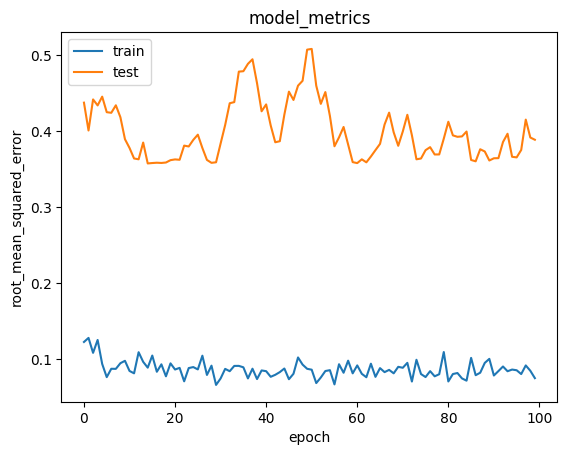

In [84]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
# Create a user-item interaction matrix
userXitem_matrix = df.pivot(index='user_id', columns='anime_id', values='rating')

In [77]:
# Calculate user similarity using cosine similarity

from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(userXitem_matrix.fillna(0))

## User based Colaborative filtering

In [78]:
def user_based_recommendations(user_id, user_item_matrix, user_similarity, n=5):
    # Get the similarity scores for the target user
    user_scores = user_similarity[user_id - 1]

    # Sort users by similarity in descending order
    similar_users = sorted(enumerate(user_scores), key=lambda x: x[1], reverse=True)

    # Initialize a list to store recommended anime
    recommended_anime = []

    for user, score in similar_users[1:]:  # Exclude the target user
        # Get the anime the similar user has rated positively
        rated_anime = user_item_matrix.loc[user_item_matrix.index[user - 1]]
        positively_rated_anime = rated_anime[rated_anime >= 6].index

        # Exclude anime the target user has already rated
        target_user_rated_anime = user_item_matrix.loc[user_id].dropna().index
        recommended_anime.extend(set(positively_rated_anime) - set(target_user_rated_anime))

        # Limit the number of recommendations
        if len(recommended_anime) >= n:
            break

    return recommended_anime[:n]

## Tes case

In [80]:
# Choose a user ID for testing
user_id = 7  # Replace with the user ID you want to test

# Test user-based recommendations
user_recommendations = user_based_recommendations(user_id, userXitem_matrix, user_similarity, n=5)

# Display the recommendations
print(f"User-Based Recommendations for User {user_id}:")
for anime_id in user_recommendations:
    anime_name = anime_df.loc[anime_df['anime_id'] == anime_id, 'name'].values[0]
    print(f"- {anime_name}")

User-Based Recommendations for User 7:
- Oni Chichi
- Kuroko no Basket
- Bleach
- Dragon Ball
- Green Green
